In [2]:
# NBVAL_IGNORE_OUTPUT

import numpy as np
import matplotlib.pyplot as plt

from gcdyn import bdms, mutators, poisson

## Parameters

### Response functions

For the birth rate we'll include an external field $f(t)$ and interaction $\phi(x, f(t))$ for temporally modulating the phenotype response

In [3]:
def f(t):
    return 2 / (1 + np.exp(-t)) - 1

def φ(x, f):
    return x - f

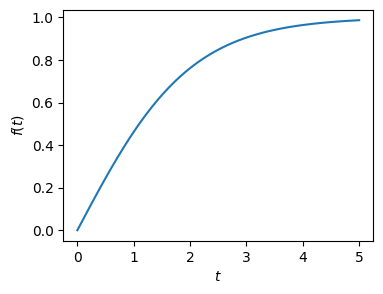

In [4]:
t = np.linspace(0, 5)
plt.figure(figsize=(4, 3))
plt.plot(t, f(t), label="f(t)")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.show()

In [6]:
birth_rate = poisson.ModulatedPhenotypeResponse(poisson.SoftReluResponse(xscale=2.0, xshift=-2.5, yscale=0.2, yshift=0.0),
                                                  f, φ)
death_rate = poisson.ConstantResponse(0.1)
mutation_rate = poisson.ConstantResponse(1.0)

### Mutator

In [7]:
mutator = mutators.GaussianMutator(shift=-0.1, scale=0.1)

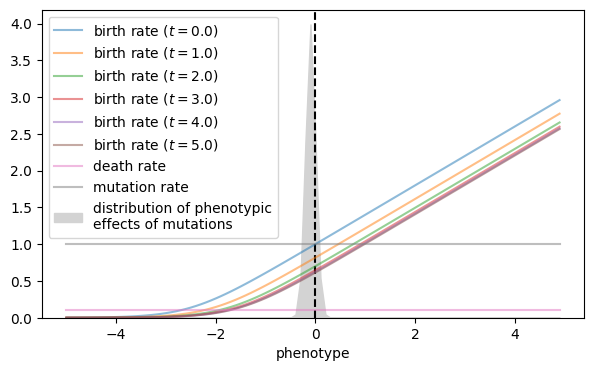

In [8]:
# NBVAL_IGNORE_OUTPUT

x_grid = np.arange(-5, 5, 0.1)

plt.figure(figsize=(7, 4))
plt.axvline(0, color="k", linestyle="--")
for t in np.linspace(0, 5, 6):
    plt.plot(x_grid, birth_rate.λ_phenotype_time(x_grid, t), label=f"birth rate ($t={t}$)", alpha=0.5)
plt.plot(x_grid, death_rate.λ_phenotype(x_grid), label="death rate", alpha=0.5)
plt.plot(x_grid, mutation_rate.λ_phenotype(x_grid), label="mutation rate", alpha=0.5)
plt.fill_between(x_grid, mutator.prob(0, x_grid), color="lightgrey", label="distribution of phenotypic\neffects of mutations")
plt.xlabel('phenotype')
# plt.ylabel('event rate')
plt.ylim(0, None)
plt.legend()
plt.show()

## Simulate

In [9]:
rng = np.random.default_rng(seed=0)

In [10]:
time_to_sampling = 5
for iter in range(1000):
    try:
        tree = bdms.TreeNode()
        tree.x = 0
        tree.evolve(
            time_to_sampling,
            birth_rate=birth_rate,
            death_rate=death_rate,
            mutation_rate=mutation_rate,
            mutator=mutator,
            min_survivors=100,
            max_leaves=1000,
            birth_mutations=False,
            seed=rng,
        )
        print(f"try {iter + 1} succeeded, tip count: {len(tree)}")
        break
    except bdms.TreeError as e:
        print(f"try {iter + 1} failed, {e}", flush=True)
        continue

try 1 failed, 'minimum number of survivors 100 not attained'
try 2 failed, 'minimum number of survivors 100 not attained'
try 3 failed, 'minimum number of survivors 100 not attained'
try 4 failed, 'minimum number of survivors 100 not attained'
try 5 failed, 'minimum number of survivors 100 not attained'
try 6 failed, 'minimum number of survivors 100 not attained'
try 7 failed, 'minimum number of survivors 100 not attained'
try 8 failed, 'minimum number of survivors 100 not attained'
try 9 failed, 'minimum number of survivors 100 not attained'
try 10 failed, 'minimum number of survivors 100 not attained'
try 11 failed, 'minimum number of survivors 100 not attained'
try 12 failed, 'minimum number of survivors 100 not attained'
try 13 failed, 'minimum number of survivors 100 not attained'
try 14 failed, 'minimum number of survivors 100 not attained'
try 15 failed, 'minimum number of survivors 100 not attained'
try 16 failed, 'minimum number of survivors 100 not attained'
try 17 failed, 'm

In [11]:
tree.sample_survivors(n=20, seed=rng)
tree.prune()

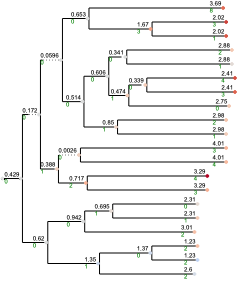

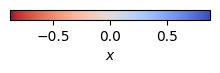

In [12]:
# NBVAL_SKIP

tree.render("%%inline")